In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols= ['Age','Fare','Survived']) # usecols diye kotogula column use kortechi seta define kore dilam.

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True) # Age er missing value fillna use kore Age er mean value diye replace kore diyechi

/var/folders/k_/w_0ddy056_b8jdbw_w07q8lh0000gn/T/ipykernel_70182/2146503404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True) # Age er missing value fillna use kore Age er mean value diye replace kore diyechi


In [6]:
# Ebar Age, fare k input er jonno and survived k output er jonno extract kore nibo.

X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


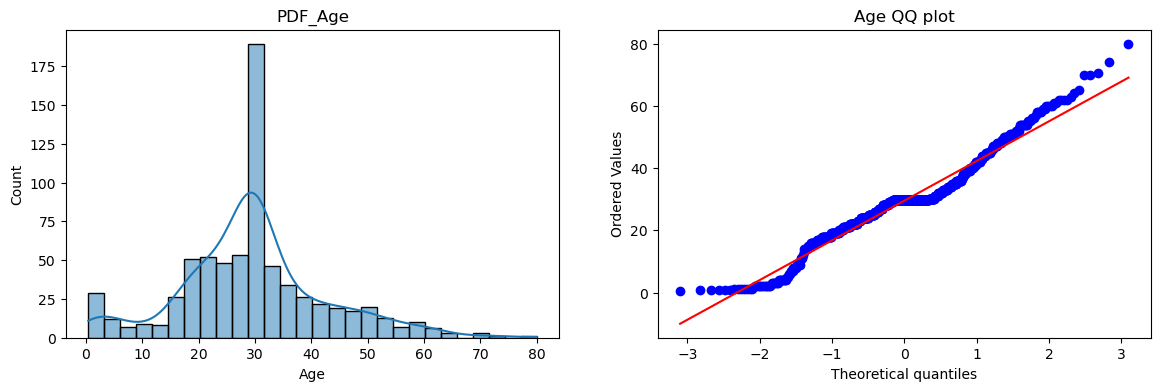

In [8]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(X_train['Age'],kde=True) # Etodin distplot use kora hoto. ekhon seta deprecated hoye geche. tai histplot use kora hoy.
plt.title("PDF_Age")


plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title("Age QQ plot")


plt.show()

In [9]:
# from sklearn.impute import SimpleImputer
# bal = SimpleImputer(strategy = 'mean')

# X_train = bal.fit_transform(X_train)
# X_test = bal.transform(X_test)

- ```stats.probplot(X_train['Age'], dist="norm", plot=plt)```

1. **`X_train['Age']`** → `Age` কলামের সব ভ্যালু নেয়।  
2. **`dist="norm"`** → বলছে যে আমরা নরমাল ডিস্ট্রিবিউশনের সাথে তুলনা করবো।  
3. **`plot=plt`** → প্লট আঁকার জন্য `matplotlib.pyplot` ইউজ করছে।  

### **Q-Q Plot কিভাবে কাজ করে?**  
- **X-axis:** তোমার ডেটার **এক্সপেক্টেড কিউয়ান্টাইলস (Expected Quantiles)** দেখায়, যদি ওগুলো নরমাল ডিস্ট্রিবিউশন মেনে চলতো।  
- **Y-axis:** তোমার ডেটার **রিয়েল কিউয়ান্টাইলস (Observed Quantiles)** দেখায়।  
- **লাল ডায়াগোনাল লাইন:** যদি তোমার ডেটা নরমাল হয়, তাহলে সব পয়েন্ট এই লাইনের উপর থাকবে বা এর কাছাকাছি থাকবে।  

### **কেন দরকার?**  
✅ যদি পয়েন্টগুলো **ডায়াগোনাল লাইনের আশেপাশে থাকে**, তাহলে ডেটা নরমাল ডিস্ট্রিবিউশন ফলো করছে।  
❌ যদি **পয়েন্টগুলো অনেক দূরে থাকে বা বাঁকানো (curved) হয়**, তাহলে ডেটা নরমাল না।  

#### **বিকল্প ভাবে হ্যান্ডেল করা:**  
যদি নরমাল না হয়, তাহলে **লগ ট্রান্সফরমেশন, স্কেলিং বা অন্য ট্রান্সফরমেশন** ইউজ করে ঠিক করা যায়।

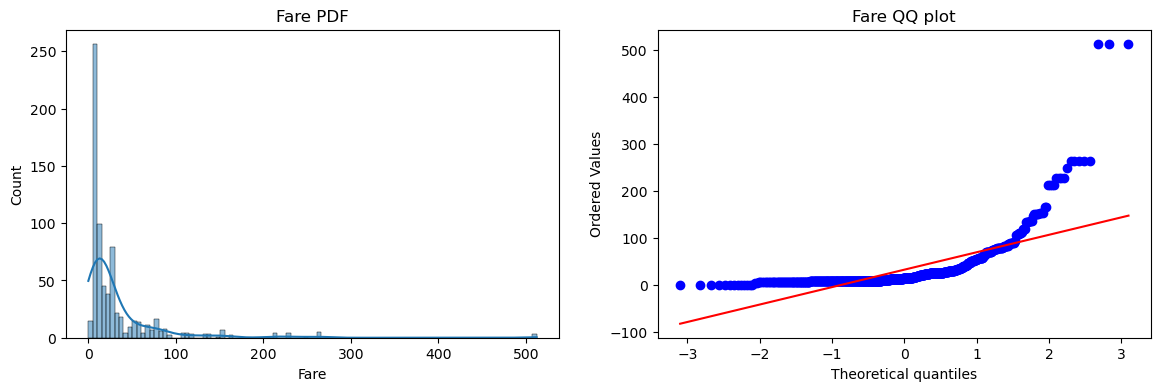

In [11]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist= "norm", plot=plt)
plt.title("Fare QQ plot")


plt.show()

In [12]:
X_train.isnull().sum()

Age     0
Fare    0
dtype: int64

In [13]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [14]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

In [16]:
print("Accuracy LR = ",accuracy_score(y_test,y_pred))
print("Accuracy DT = ",accuracy_score(y_test,y_pred1))

Accuracy LR =  0.6480446927374302
Accuracy DT =  0.6759776536312849


- **After using log**

In [18]:
trf = FunctionTransformer(func = np.log1p)

- **np.log1p কী?**
```np.log1p(x)``` আসলে ```log(1 + x)``` হিসাব করে।
এটা লগ ট্রান্সফরমেশন এর মতোই, কিন্তু ```x = 0``` হলে সমস্যা হয় না।

- **কেন দরকার?**

👉 যখন ডেটাতে ```outliers``` বা ```extreme values``` থাকে, তখন ```log1p``` ট্রান্সফরমেশন ডেটাকে নরমাল ডিস্ট্রিবিউশনের কাছাকাছি আনতে সাহায্য করে।

In [20]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [21]:
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()

In [22]:
clf2.fit(X_train_transformed,y_train)
clf3.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [23]:
y_pred2 = clf2.predict(X_test_transformed)
y_pred3 = clf3.predict(X_test_transformed)

In [24]:
print("Accuracy LR = ",accuracy_score(y_test,y_pred2))
print("Accuracy DT = ",accuracy_score(y_test,y_pred3))

Accuracy LR =  0.6815642458100558
Accuracy DT =  0.6703910614525139


- Amra dekhtechi j ager theke log use kore LR er accuracy beshi hoyeche. ekhon asholei accuracy beshi hoyeche kina seta dekhar
jonno cross validation korbo. 

- cross validation kore dekhte pelam j asholei accuracy barche.

In [50]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6543820224719102


- Ekhon amra dekhbo ```Log``` use korar por Kirokom change ashe.

Text(0.5, 1.0, 'After using Log')

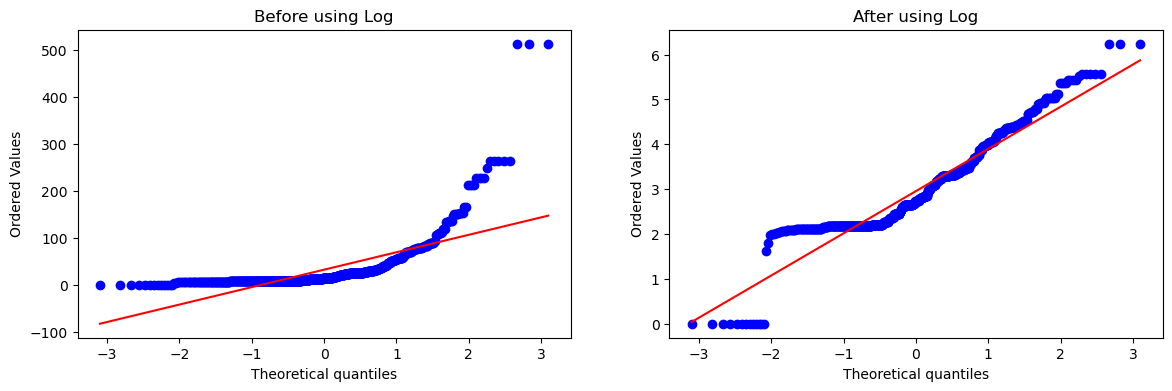

In [61]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist= 'norm', plot=plt)
plt.title('Before using Log')


plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist= 'norm', plot = plt)
plt.title('After using Log')

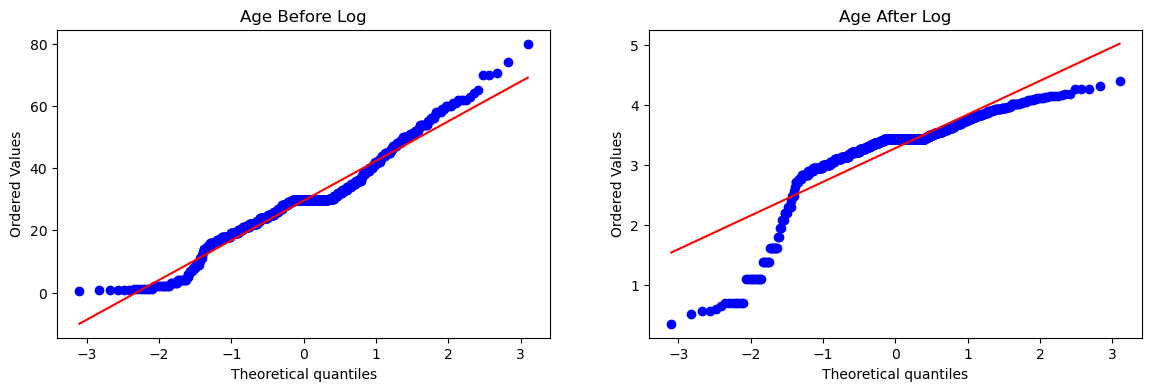

In [63]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

- ekhane dekhtechi age er khetre accuracy kharap hoye geche

In [82]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough') #Ekhane amra just Fare e log use korechi. Age e log use kori ni.

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [84]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [80]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6633333333333333


In [86]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
     

Accuracy 0.6195131086142323


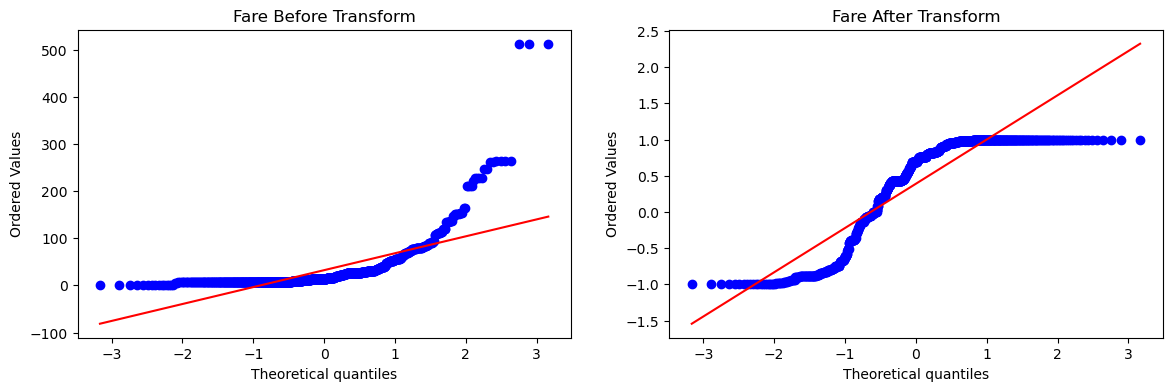

In [88]:
apply_transform(np.sin)